# Exploratory analysis of nodule images

## Import modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from lung_cancer_detection.data.nodule import ClassificationDataModule
from lung_cancer_detection.utils import preview_dataset, load_json

## Setup data module

In [3]:
rp = Path("/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/").absolute()
dp = rp/"processed"
cp = (Path()/"../data/cache/").absolute()
sp = rp/"splits"
cp.mkdir(exist_ok=True)
print(dp.exists(), cp.exists(), sp.exists())

True True True


In [4]:
splits = [load_json(f) for f in sp.iterdir()]

In [5]:
dm = ClassificationDataModule(dp, 
                              cp, 
                              splits, 
                              min_anns=1, 
                              exclude_labels=[], 
                              label_mapping=([1,2,3,4,5], [0,0,1,2,2]))

In [6]:
dm.setup()

## Preview training set

### Preview benign nodules

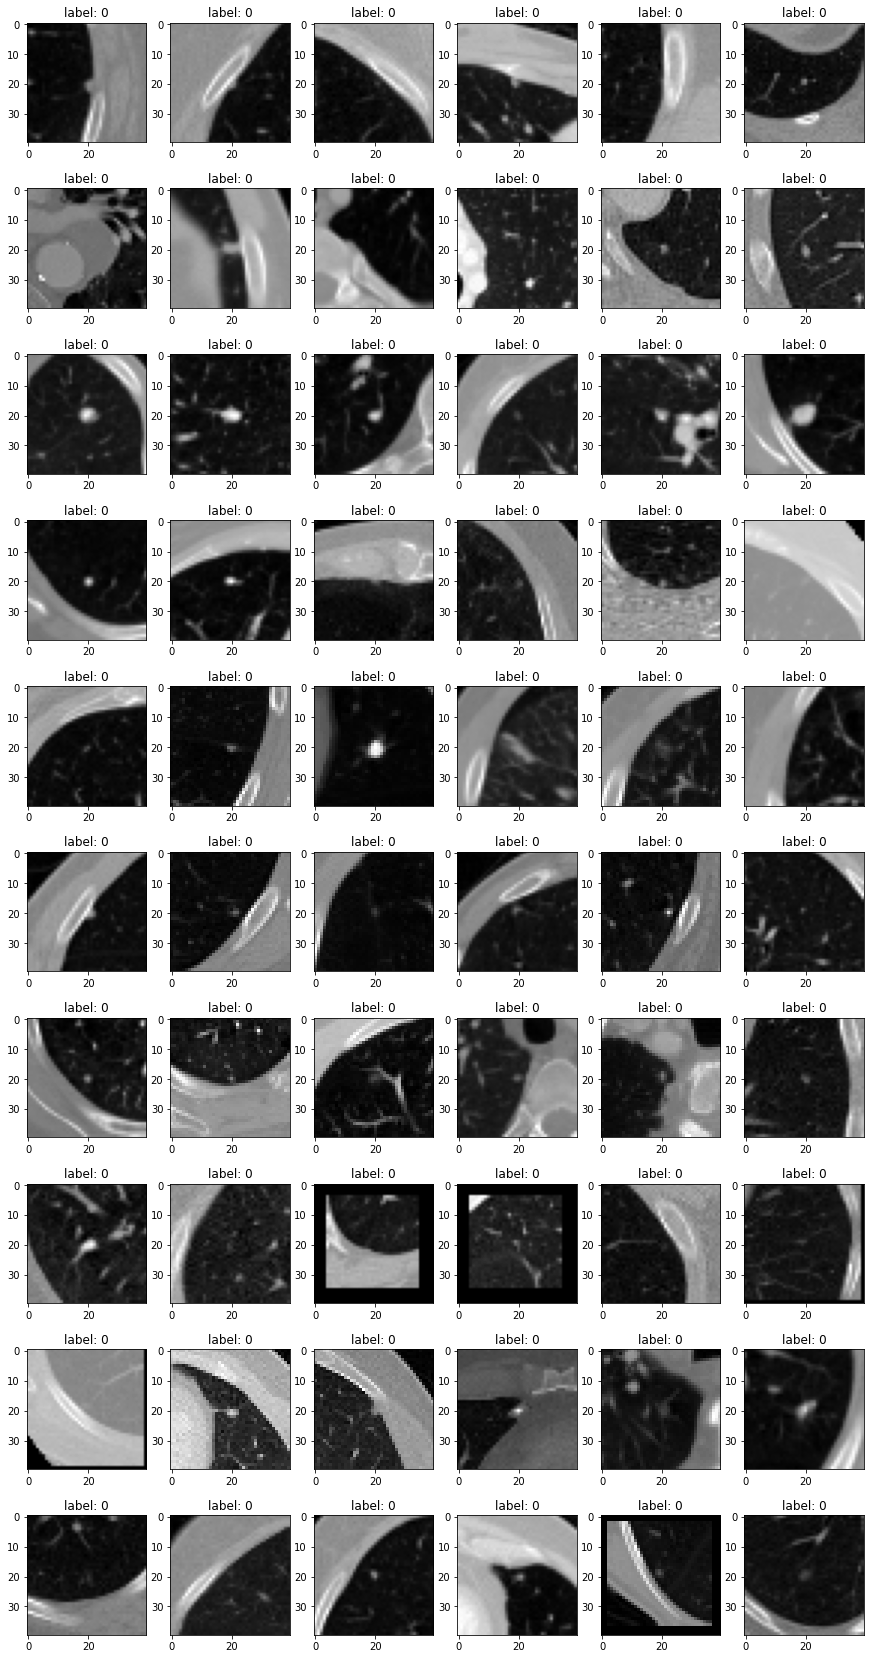

In [7]:
preview_dataset(dm.query(n=60, labels=[0]))

### Preview indeterminate nodules

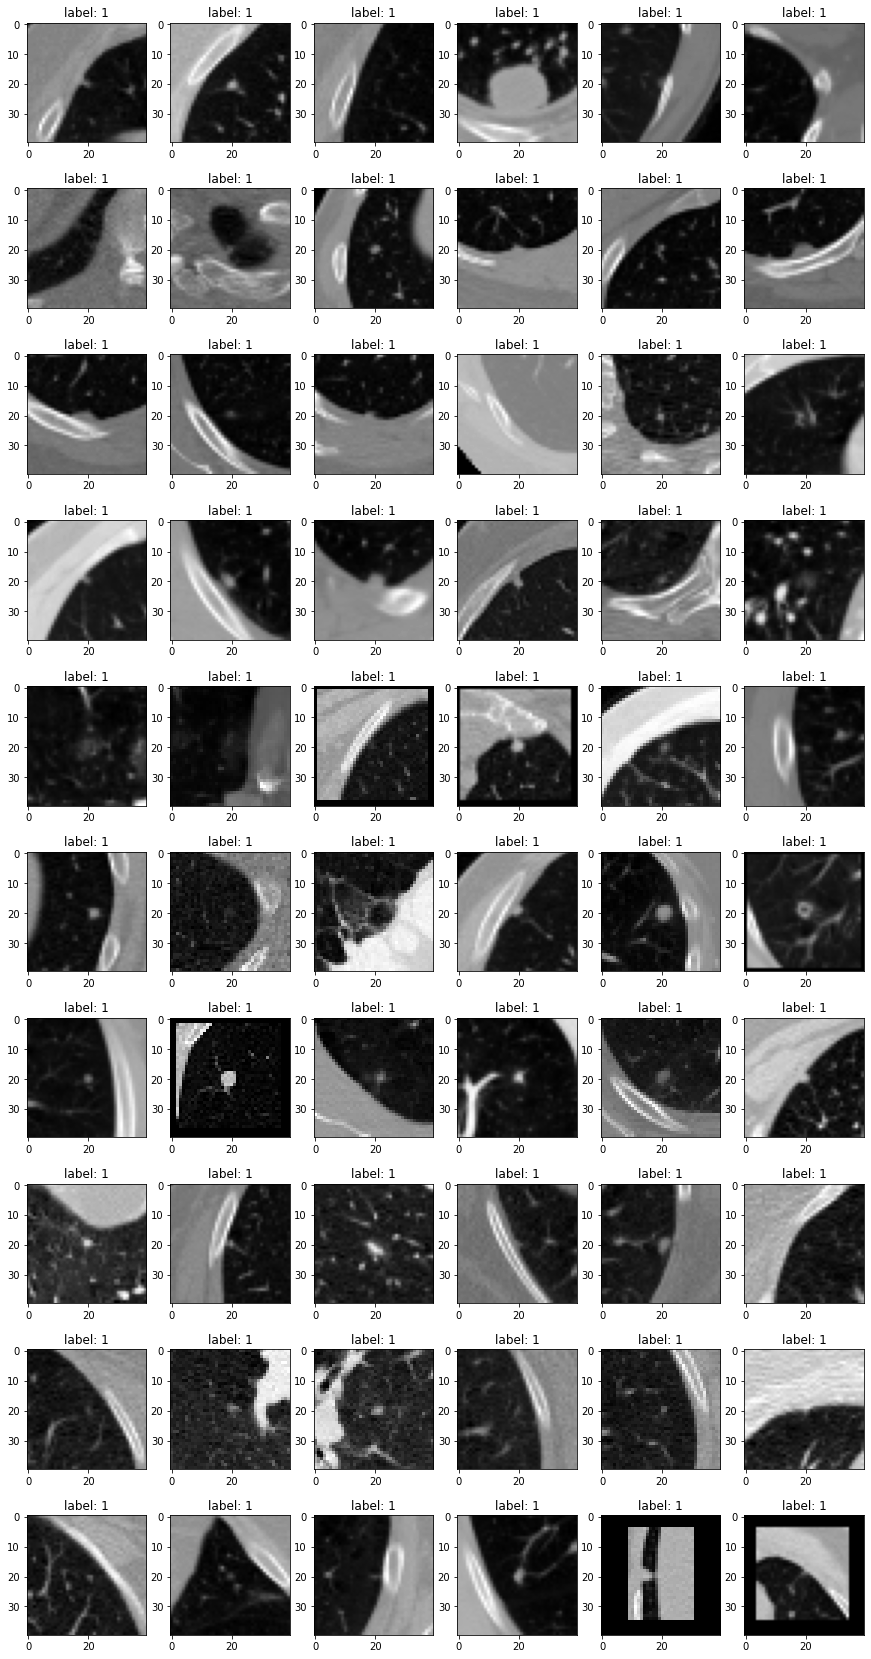

In [8]:
preview_dataset(dm.query(n=60, labels=[1]))

### Preview malignant nodules

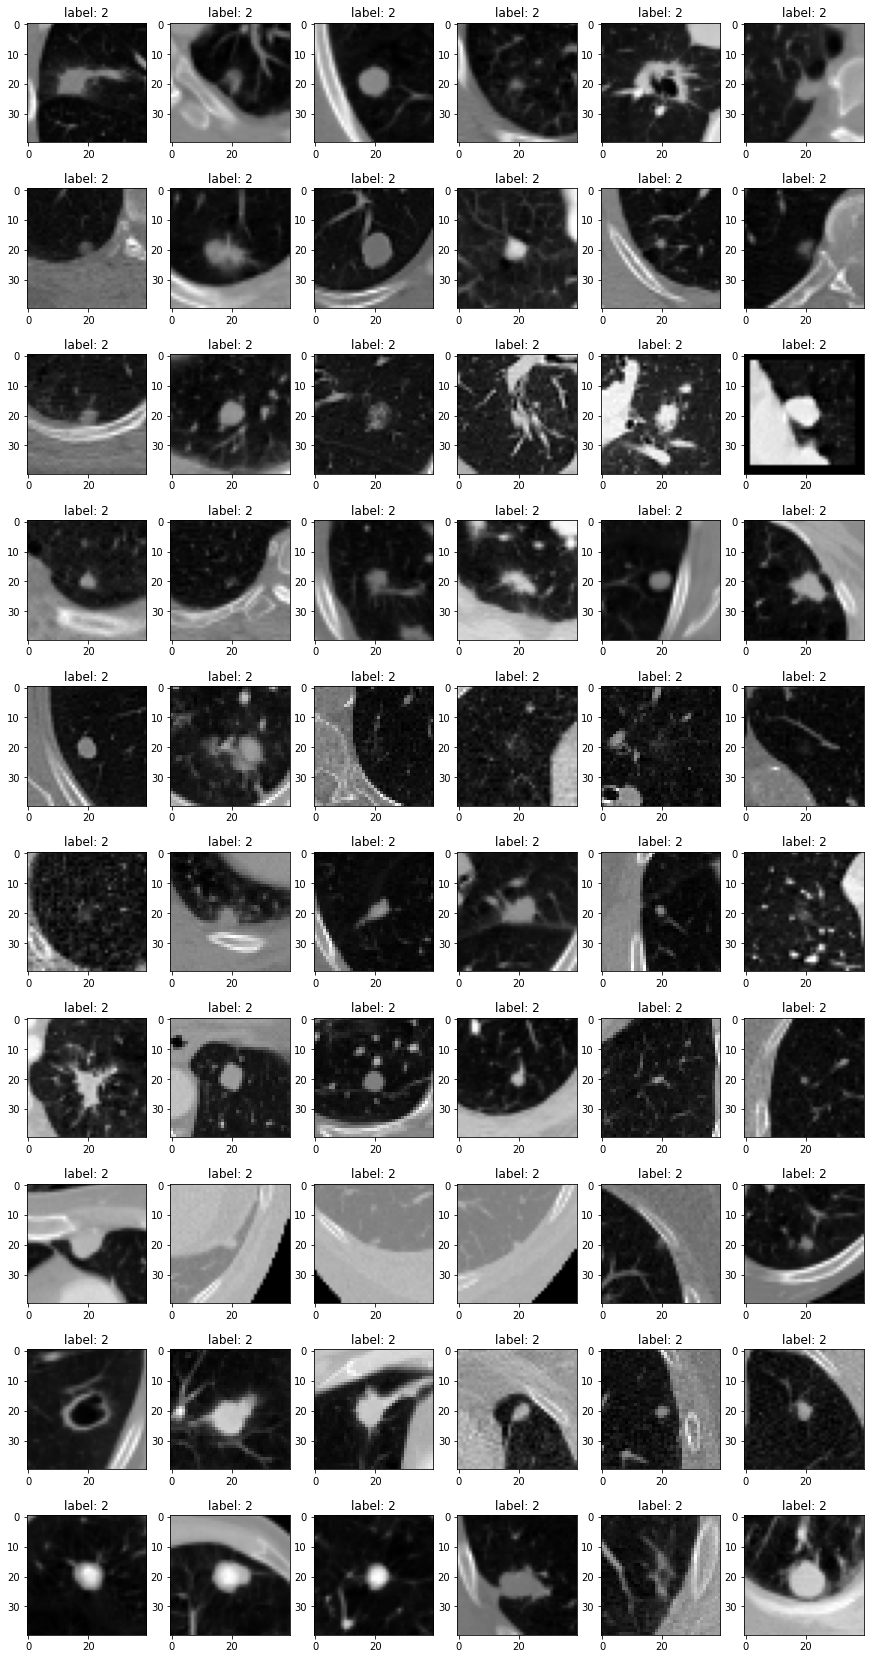

In [9]:
preview_dataset(dm.query(n=60, labels=[2]))

## Preview validation set

### Preview benign nodules

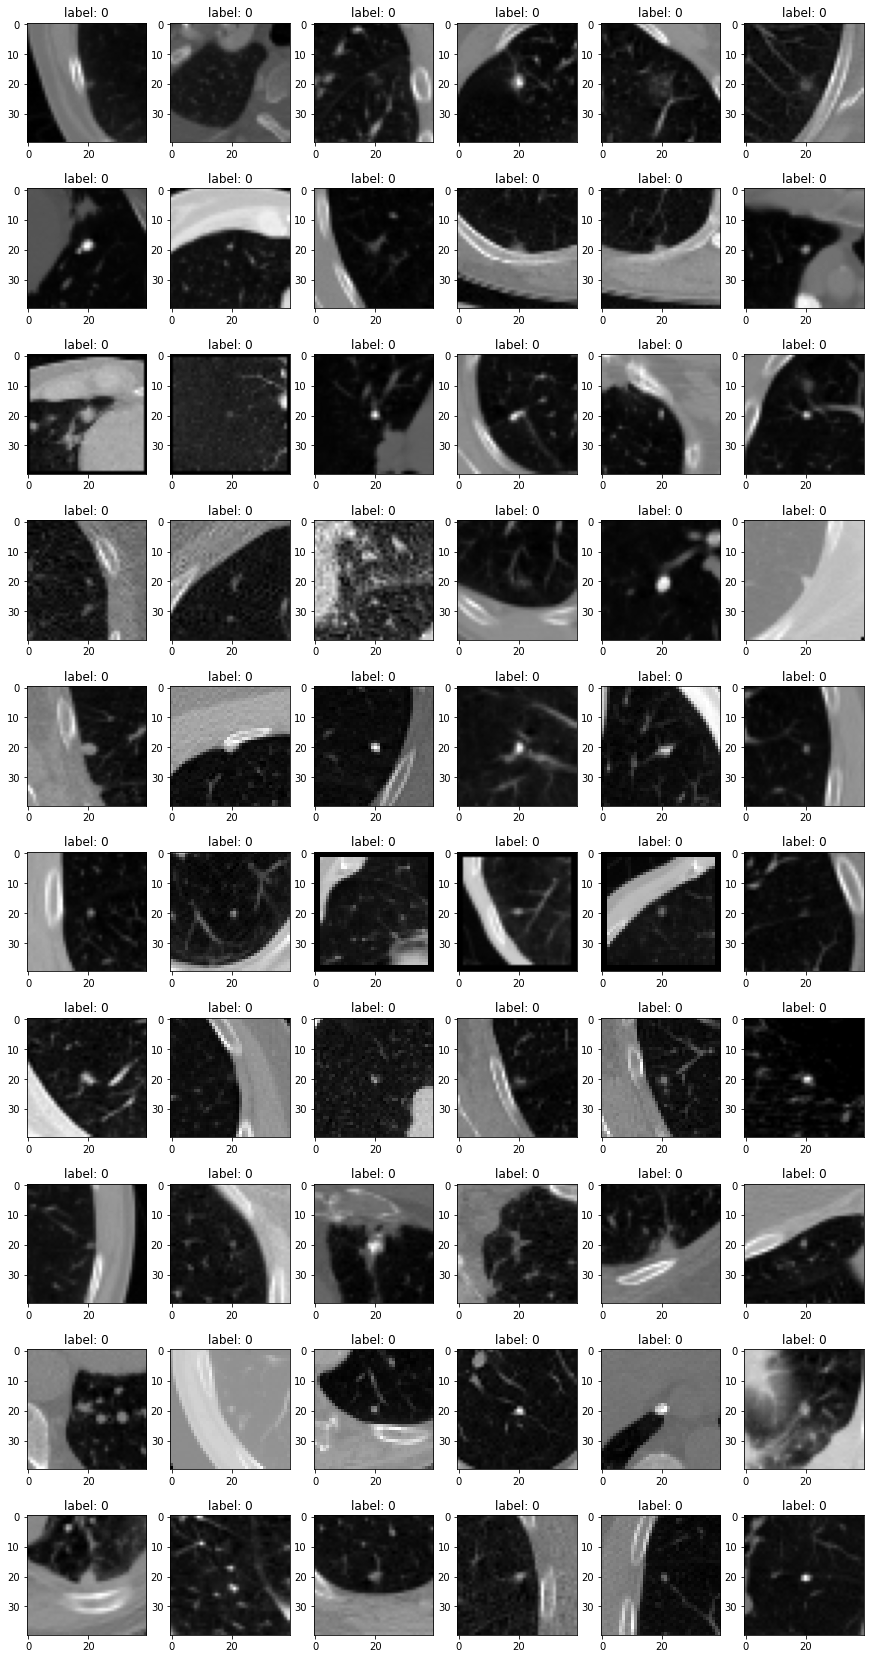

In [11]:
preview_dataset(dm.query(split="val", n=60, labels=[0]))

### Preview indeterminate nodules

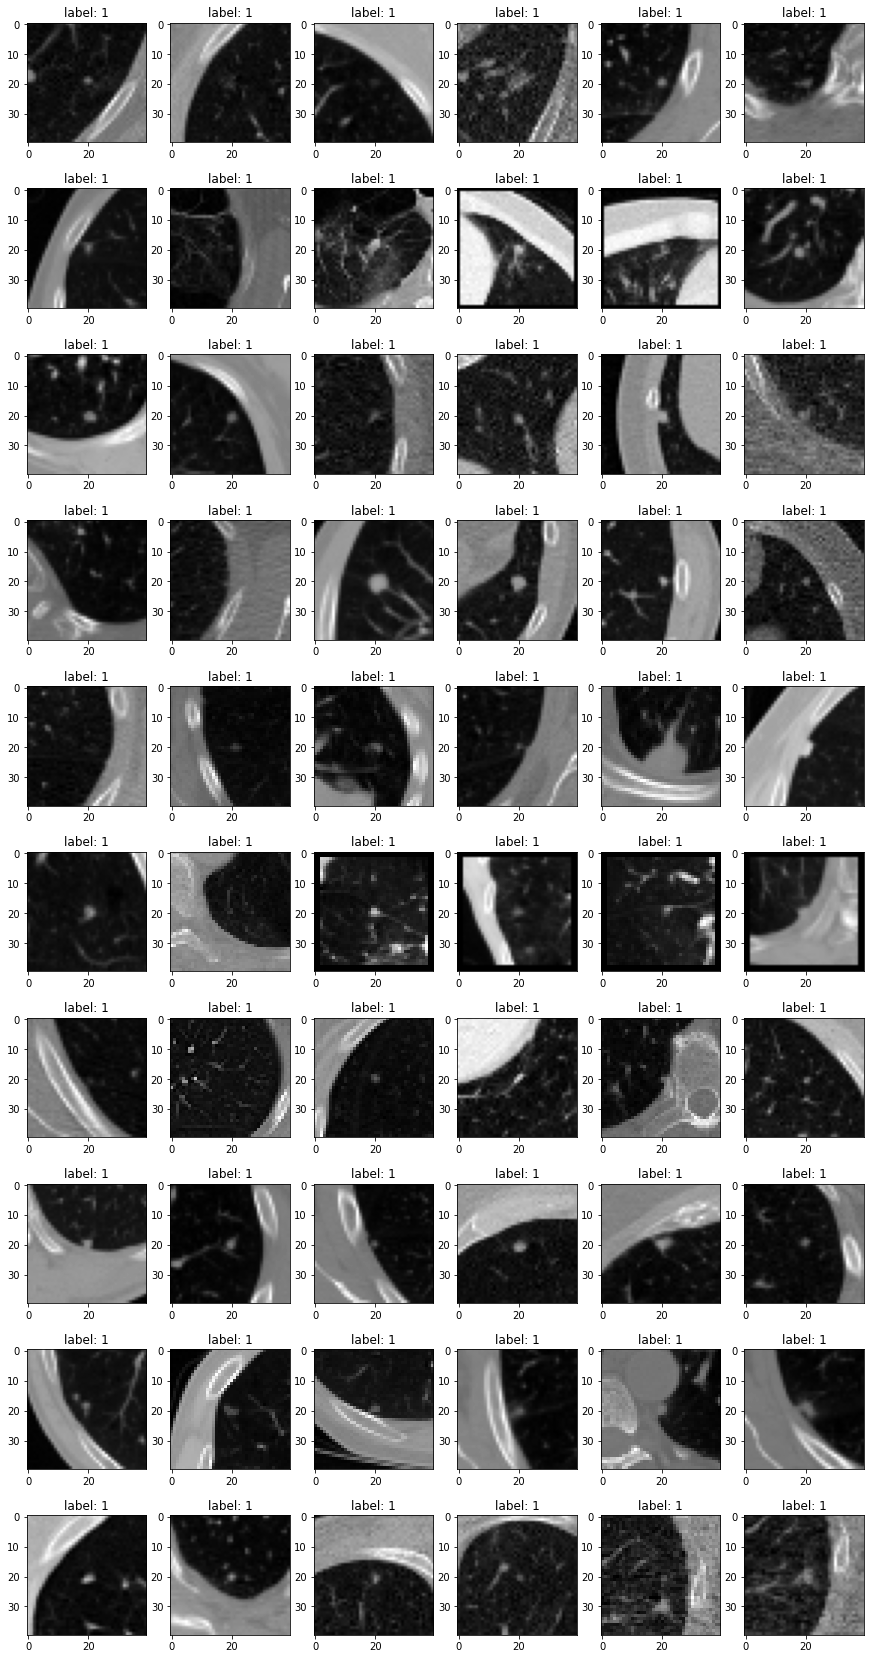

In [12]:
preview_dataset(dm.query(split="val", n=60, labels=[1]))

### Preview malignant nodules

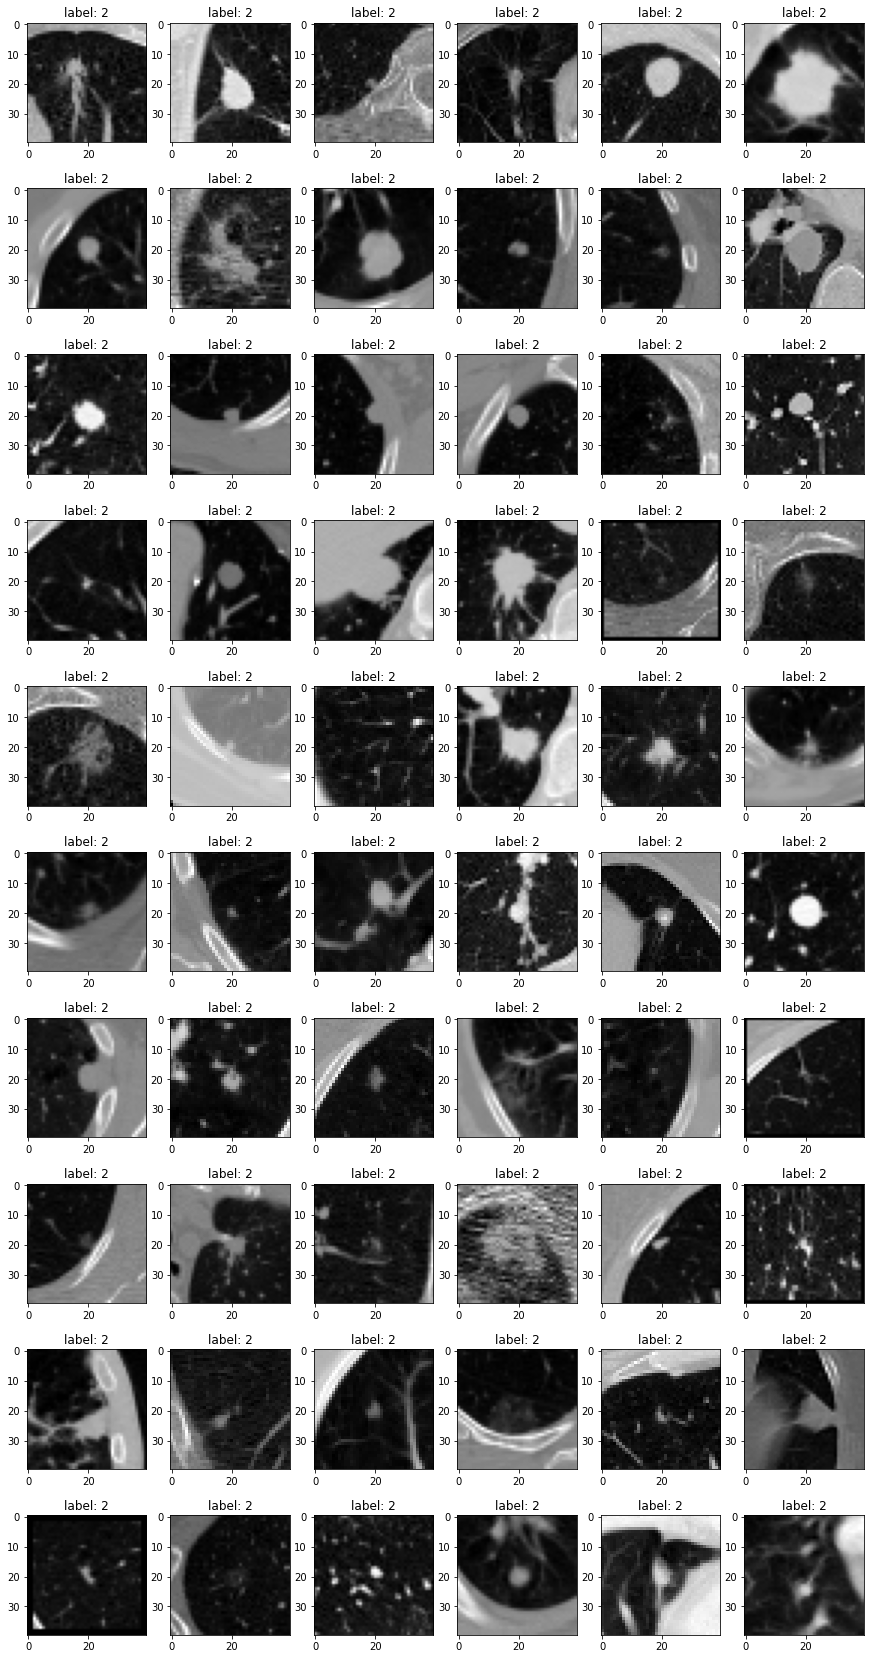

In [13]:
preview_dataset(dm.query(split="val", n=60, labels=[2]))